## Detection of dolphin whistles on each file & encounter

In [1]:
import os
import numpy as np
import librosa

In [2]:
from math import floor
from lib_augment import load_and_normalize
from lib_feature import feature_whistleness

%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
deploy_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
fs = 48000
time_reso = 0.02
hop_length = int(time_reso*fs)  #
species_list = list(species_dict.keys())
species_id = list(species_dict.values())

In [4]:
# loading the trained model
from tensorflow.keras.models import load_model
import tensorflow_addons.layers.spatial_pyramid_pooling as spp


model_whistleness_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_whistleness/2021-02-02_200514_resnet18_expt_alldata_run0_f1_lr_0.001/epoch_163_valloss_0.2434_valacc_0.9472.hdf5'
model_whistleness = load_model(model_whistleness_path)
model_whistleness.summary()

# model_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210303_233728/STAR2000/epoch_53_valloss_0.9505_valacc_0.7552.hdf5'
# model_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210305_105231/STAR2000/epoch_56_valloss_0.1945_valacc_0.7305.hdf5'
model_species_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210310_095616/STAR2000/epoch_48_valloss_0.1938_valacc_0.7403.hdf5'

model_species = load_model(model_species_path)
model_species.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 128, 1) 0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 100, 128, 16) 144         input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 100, 128, 16) 64          conv0[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 100, 128, 16) 0           bn_conv1[0][0]                   
______________________________________________________________________________________________

In [5]:
def enounter_features(encounter_folder, win_size, stpe_size):
    sound_files = os.listdir(encounter_folder)
    sound_files.sort()
    
    spec_feas_curr = []
    samples_tot = 0
    for ff in sound_files:
    # for ff in sound_files[:2]:
    # for ff in [sound_files[1]]:
        print('=='+ff)
        samples, _ = librosa.load(os.path.join(encounter_folder, ff), sr=fs)
        # print('Sound length: '+str(samples.shape[0]/fs))
        samples_tot += samples.shape[0]
        if samples.ndim >= 2:
            samples = samples[:, 0]

        for ss in range(floor((samples.shape[0]-win_size)/step_size)+1):
            samples_curr = samples[ss*step_size:ss*step_size+win_size]
            samples_curr = samples_curr - samples_curr.mean()

            spectro = librosa.feature.melspectrogram(samples_curr,sr=fs, hop_length=960, power=1.0)
            # spectro = librosa.feature.melspectrogram(samples_curr,sr=fs)
            spec_feas_curr.append(feature_whistleness(spectro))
    sec_tot  = samples_tot/fs
    print('Total sound length: '+str(sec_tot))
    spec_feas = np.stack(spec_feas_curr)
    spec_feas = np.expand_dims(spec_feas[:, :100, :], axis=3)
    
    # score = model_species.predict(spec_feas)
    
    return spec_feas, sec_tot

In [6]:
species_to_code = {'bottlenose': 'BD', 'longbeaked_common': 'CD', 'shortbeaked_common': 'CD', 'common': 'CD',
                   'striped': 'STR', 'spotted': 'SPT', 'spinner': 'SPIN', 'pilot': 'PLT', 'roughtoothed': 'RT',
                   'false_killer': 'FKW'}

In [7]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [8]:
# species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
fs = 48000
time_reso = 0.02
hop_length = int(time_reso*fs)  #

step_sec = 0.1
# step_size = int(1.0*fs)
step_size = int(step_sec*fs)
win_size = int(2.0*fs)

## STAR2000

In [9]:
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'

In [10]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [11]:
encounter_test

['bottlenose s352',
 'bottlenose s46',
 'longbeaked_common s329',
 'longbeaked_common s338',
 'pilot s288',
 'roughtoothed s417',
 'shortbeaked_common s282',
 'shortbeaked_common s302',
 'shortbeaked_common s303',
 'shortbeaked_common s313',
 'shortbeaked_common s346',
 'shortbeaked_common s368',
 'shortbeaked_common s374',
 'shortbeaked_common s375',
 'shortbeaked_common s376',
 'shortbeaked_common s377',
 'shortbeaked_common s378',
 'shortbeaked_common s48',
 'shortbeaked_common s515',
 'shortbeaked_common s561',
 'spinner s111',
 'spinner s447',
 'spinner s459',
 'spinner s522',
 'spinner s63',
 'spotted s125',
 'spotted s394',
 'spotted s42',
 'spotted s498',
 'striped s17',
 'striped s274',
 'striped s380',
 'striped s39',
 'striped s395',
 'striped s396',
 'striped s398',
 'striped s399',
 'striped s445',
 'striped s455',
 'striped s472',
 'striped s483',
 'striped s6',
 'striped s88',
 'striped s92']

In [12]:
### run on a encounter encounter[0]

avg_score_list = []
species_10s_pred = []
species_10s_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in [encounter_test[0]]:
# for ee in ['shortbeaked_common s628']:
    print(ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas, sec_tot = enounter_features(encounter_folder, win_size, step_size)
    
    whistleness = model_whistleness.predict(spec_feas)
    whistleness_bin = whistleness[:, 1]>0.9
    num_whistle = np.where(whistleness_bin)[0].shape[0]
    num_frames = whistleness.shape[0]
    print('Number of whistleness frames: '+str(num_whistle)+'/'+str(num_frames)+'('+'str(num_whistle/num_frames)'+')')
    scores = model_species.predict(spec_feas)
    
    # For the whole encounter
    # ave score
    label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.50))))  # .mean(axis=0)
    num_large_score =(label_pred>0.0).sum(axis=0)
    total_score = label_pred.sum(axis=0)
    avg_score = np.zeros(8)
    for cc in range(8):
        if num_large_score[cc] > 0:
            avg_score[cc] = total_score[cc] / num_large_score[cc]
    avg_score_list.append(avg_score)
    print('average score:')
    print(avg_score)
    
    # count_large = (scores>0.70).sum(axis=0)
    print('count_large:')
    print(num_large_score)
    
    # For each 10 sec / 100 frames
    for ii in range(int(floor(num_frames*1.0/100))):
        score_curr = scores[ii*100:(ii+1)*100]
        whistle_bin_curr = whistleness[ii*100:(ii+1)*100, 1]>0.9
        print('Whistleness:')
        num_whistleness_curr = np.where(whistle_bin_curr)[0].shape[0]
        print(num_whistleness_curr)
        
        label_pred_curr = np.sqrt(((score_curr**2.0)*(np.multiply(whistle_bin_curr.reshape(-1, 1), np.ones((1,8))))*((score_curr>0.50))))  # .mean(axis=0)
        num_large_score =(label_pred_curr>0.0).sum(axis=0)
        total_score = label_pred_curr.sum(axis=0)
        avg_score_curr = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score_curr[cc] = total_score[cc] / num_large_score[cc]
        print('average score:')
        print(avg_score_curr)
        
        # count_large = (scores>0.70).sum(axis=0)
        print('count_large:')
        print(num_large_score)
        
        if num_whistleness_curr >= 20:  # whistleness over 2 sec
            species_10s_pred.append(np.argmax(total_score, axis=0))
            species_10s_truth.append(species_dict[species_to_code[ee.split(" ")[0]]])
    print('  ')

bottlenose s352
==Acst0953.b02.wav
==Acst0954.b02.wav
==Acst0955.b02.wav
==Acst0956.b02.wav
==Acst0957.b02.wav
Total sound length: 282.33804166666664
Number of whistleness frames: 1553/2726(str(num_whistle/num_frames))
average score:
[0.75 0.82 0.74 0.77 0.72 0.74 0.81 0.76]
count_large:
[109 204 136 259  43  91 339  81]
Whistleness:
100
average score:
[0.81 0.71 0.7  0.76 0.   0.   0.83 0.  ]
count_large:
[ 6  2 18 19  0  0 36  0]
Whistleness:
99
average score:
[0.   0.79 0.   0.69 0.   0.   0.79 0.64]
count_large:
[ 0 24  0  6  0  0 46  6]
Whistleness:
28
average score:
[0.61 0.   0.   0.   0.   0.74 0.   0.  ]
count_large:
[ 9  0  0  0  0 12  0  0]
Whistleness:
39
average score:
[0.   0.   0.73 0.6  0.79 0.65 0.77 0.52]
count_large:
[ 0  0  6  3 12  5 11  1]
Whistleness:
78
average score:
[0.87 0.   0.   0.68 0.   0.85 0.8  0.  ]
count_large:
[17  0  0 10  0 18 12  0]
Whistleness:
93
average score:
[0.63 0.74 0.   0.83 0.62 0.71 0.78 0.83]
count_large:
[ 6  2  0 39  6  3  5  3]
Whis

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(species_10s_truth, species_10s_pred, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[  5   3   2  10   1   1   8   2]
 [ 91 356 130 137   1  53  27   1]
 [ 40  29  78 129   0  12   1   3]
 [  2  14   0 145   1   3   0   0]
 [ 29   4   7  57   2   1   0   1]
 [  0   0   0   0   0   6   0   0]
 [  5   0   1   1   0   0  10   2]
 [  0   0   0   0   0   0   0   0]]

[[0.16 0.09 0.06 0.31 0.03 0.03 0.25 0.06]
 [0.11 0.45 0.16 0.17 0.   0.07 0.03 0.  ]
 [0.14 0.1  0.27 0.44 0.   0.04 0.   0.01]
 [0.01 0.08 0.   0.88 0.01 0.02 0.   0.  ]
 [0.29 0.04 0.07 0.56 0.02 0.01 0.   0.01]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.26 0.   0.05 0.05 0.   0.   0.53 0.11]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [14]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

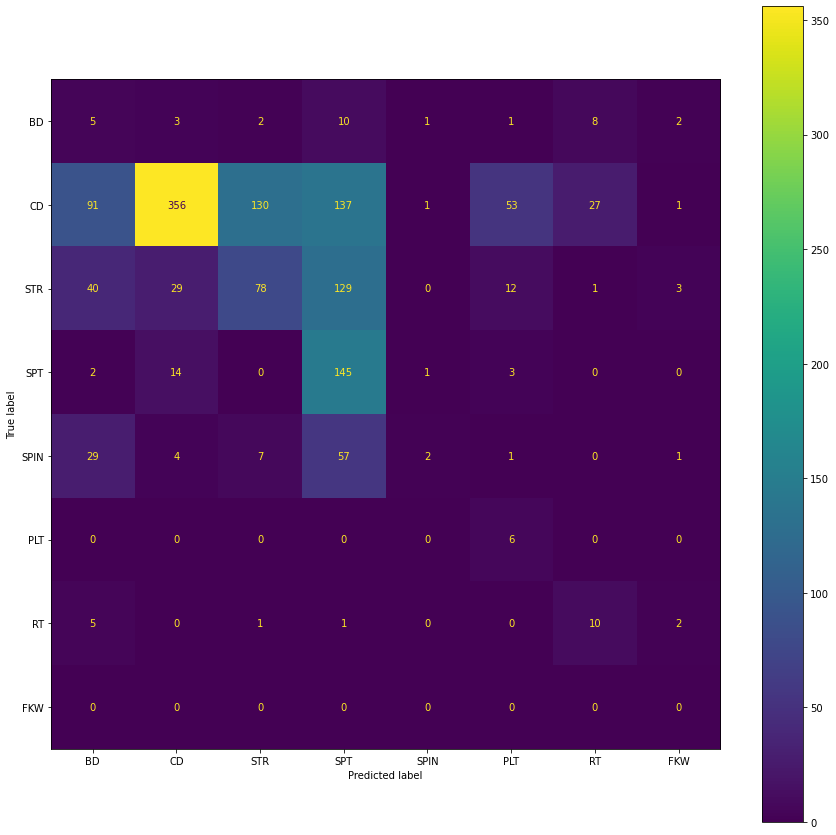

In [15]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


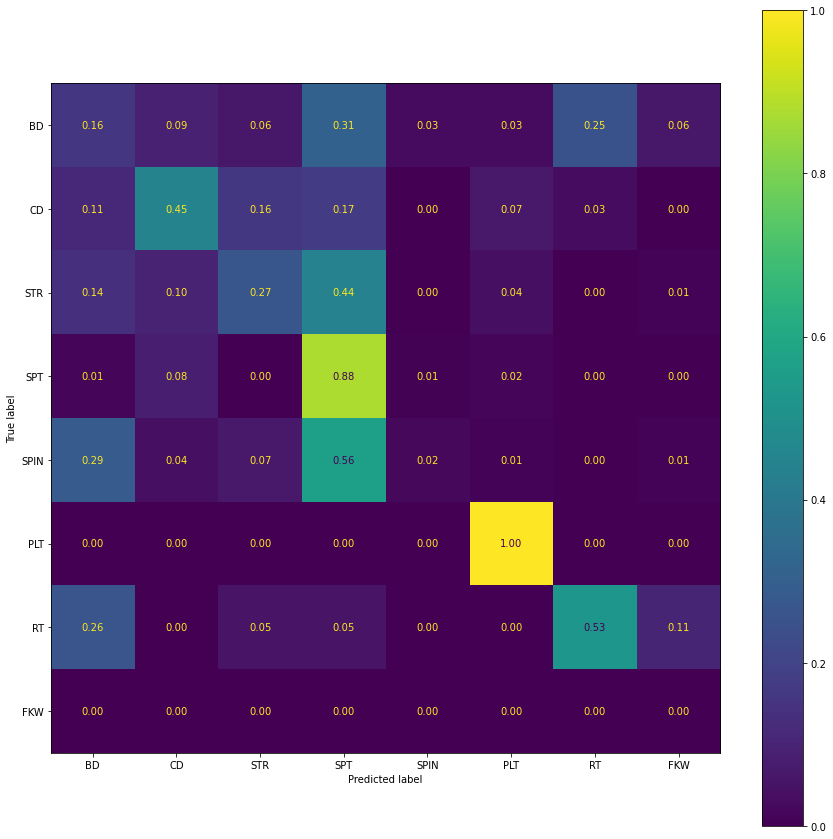

In [16]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

## STAR 2003

In [17]:
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'

In [18]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [19]:
encounter_test

['bottlenose s494',
 'bottlenose s516',
 'bottlenose s586',
 'false_killer s776',
 'longbeaked_common s482',
 'shortbeaked_common s489',
 'shortbeaked_common s627',
 'shortbeaked_common s628',
 'shortbeaked_common s631',
 'shortbeaked_common s640',
 'shortbeaked_common s792',
 'spinner s757',
 'spotted s508',
 'spotted s511',
 'striped s652',
 'striped s784',
 'striped s788']

In [20]:
### run on a encounter encounter[0]

avg_score_list = []
species_10s_pred = []
species_10s_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in [encounter_test[0]]:
# for ee in ['shortbeaked_common s628']:
    print(ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas, sec_tot = enounter_features(encounter_folder, win_size, step_size)
    
    whistleness = model_whistleness.predict(spec_feas)
    whistleness_bin = whistleness[:, 1]>0.9
    num_whistle = np.where(whistleness_bin)[0].shape[0]
    num_frames = whistleness.shape[0]
    print('Number of whistleness frames: '+str(num_whistle)+'/'+str(num_frames)+'('+'str(num_whistle/num_frames)'+')')
    scores = model_species.predict(spec_feas)
    
    # For the whole encounter
    # ave score
    label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.50))))  # .mean(axis=0)
    num_large_score =(label_pred>0.0).sum(axis=0)
    total_score = label_pred.sum(axis=0)
    avg_score = np.zeros(8)
    for cc in range(8):
        if num_large_score[cc] > 0:
            avg_score[cc] = total_score[cc] / num_large_score[cc]
    avg_score_list.append(avg_score)
    print('average score:')
    print(avg_score)
    
    # count_large = (scores>0.70).sum(axis=0)
    print('count_large:')
    print(num_large_score)
    
    # For each 10 sec / 100 frames
    for ii in range(int(floor(num_frames*1.0/100))):
        score_curr = scores[ii*100:(ii+1)*100]
        whistle_bin_curr = whistleness[ii*100:(ii+1)*100, 1]>0.9
        print('Whistleness:')
        num_whistleness_curr = np.where(whistle_bin_curr)[0].shape[0]
        print(num_whistleness_curr)
        
        label_pred_curr = np.sqrt(((score_curr**2.0)*(np.multiply(whistle_bin_curr.reshape(-1, 1), np.ones((1,8))))*((score_curr>0.50))))  # .mean(axis=0)
        num_large_score =(label_pred_curr>0.0).sum(axis=0)
        total_score = label_pred_curr.sum(axis=0)
        avg_score_curr = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score_curr[cc] = total_score[cc] / num_large_score[cc]
        print('average score:')
        print(avg_score_curr)
        
        # count_large = (scores>0.70).sum(axis=0)
        print('count_large:')
        print(num_large_score)
        
        if num_whistleness_curr >= 30:  # whistleness over 3 sec
            species_10s_pred.append(np.argmax(total_score, axis=0))
            species_10s_truth.append(species_dict[species_to_code[ee.split(" ")[0]]])
    print('  ')

bottlenose s494
==STAR031106-113842.wav
Total sound length: 36.05
Number of whistleness frames: 73/341(str(num_whistle/num_frames))
average score:
[0.76 0.64 0.73 0.65 0.65 0.71 0.71 0.  ]
count_large:
[11  8  3 15  3  8  1  0]
Whistleness:
36
average score:
[0.   0.64 0.55 0.62 0.65 0.   0.71 0.  ]
count_large:
[0 8 1 5 3 0 1 0]
Whistleness:
16
average score:
[0.   0.   0.82 0.54 0.   0.73 0.   0.  ]
count_large:
[0 0 2 2 0 6 0 0]
Whistleness:
21
average score:
[0.76 0.   0.   0.7  0.   0.65 0.   0.  ]
count_large:
[11  0  0  8  0  2  0  0]
  
bottlenose s516
==STAR031109-114625.wav
==STAR031109-114829.wav
==STAR031109-114858.wav
==STAR031109-114921.wav
==STAR031109-115000.wav
==STAR031109-115149.wav
==STAR031109-115201.wav
==STAR031109-115500.wav
Total sound length: 433.8
Number of whistleness frames: 1621/4184(str(num_whistle/num_frames))
average score:
[0.81 0.7  0.64 0.72 0.67 0.   0.   0.72]
count_large:
[780  58 142 209  19   0   0   1]
Whistleness:
34
average score:
[0.73 0.   

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(species_10s_truth, species_10s_pred, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[ 53   4   2   4   0   0   1   0]
 [  0 152   0   0   0   0   1   1]
 [  0  12   3   0   0   0   0   0]
 [  0   0   1  93   0   0   0   0]
 [  0   1   2   3  10   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  75]]

[[0.83 0.06 0.03 0.06 0.   0.   0.02 0.  ]
 [0.   0.99 0.   0.   0.   0.   0.01 0.01]
 [0.   0.8  0.2  0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.99 0.   0.   0.   0.  ]
 [0.   0.06 0.12 0.19 0.62 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


In [22]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

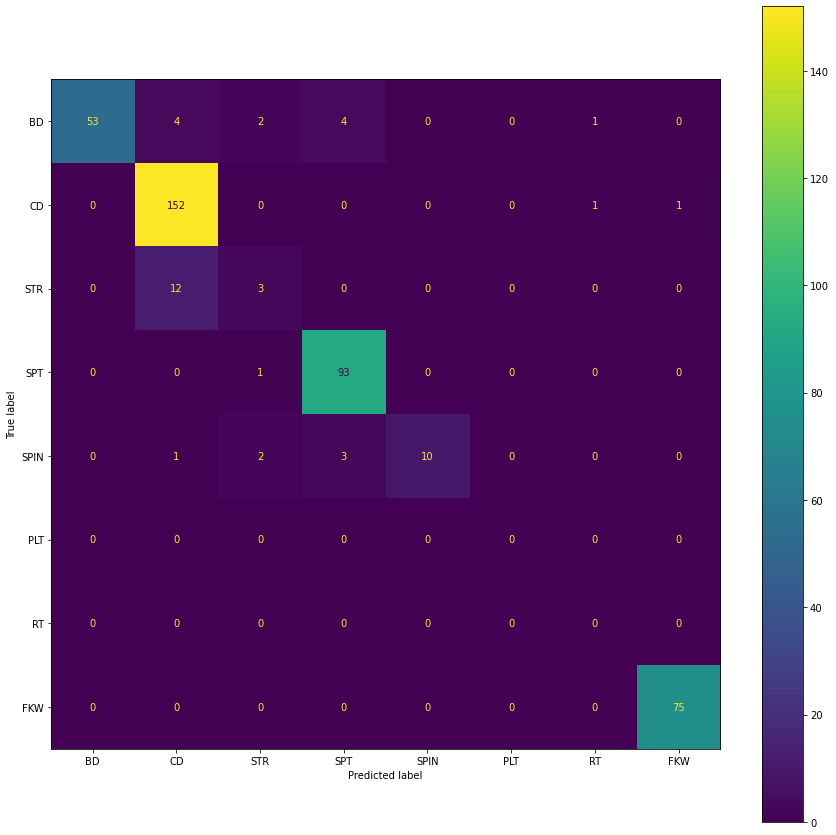

In [23]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


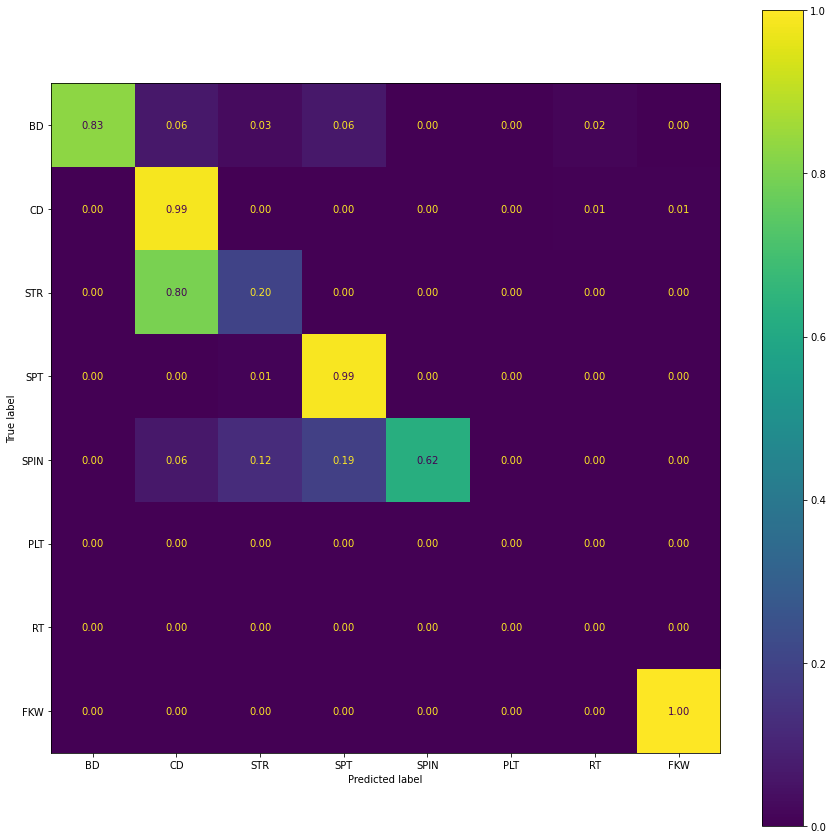

In [24]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

## STAR 2006

In [25]:
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'

In [26]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [27]:
encounter_test

['false_killer s128',
 'pilot s142',
 'pilot s144',
 'pilot s145',
 'pilot s154',
 'pilot s156',
 'pilot s223',
 'pilot s230',
 'roughtoothed s112',
 'roughtoothed s153',
 'shortbeaked_common s216',
 'spinner s110',
 'spotted s237',
 'striped s111',
 'striped s115',
 'striped s138',
 'striped s205',
 'striped s248']

In [28]:
### run on a encounter encounter[0]

avg_score_list = []
species_10s_pred = []
species_10s_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in [encounter_test[0]]:
# for ee in ['shortbeaked_common s628']:
    print(ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas, sec_tot = enounter_features(encounter_folder, win_size, step_size)
    
    whistleness = model_whistleness.predict(spec_feas)
    whistleness_bin = whistleness[:, 1]>0.9
    num_whistle = np.where(whistleness_bin)[0].shape[0]
    num_frames = whistleness.shape[0]
    print('Number of whistleness frames: '+str(num_whistle)+'/'+str(num_frames)+'('+'str(num_whistle/num_frames)'+')')
    scores = model_species.predict(spec_feas)
    
    # For the whole encounter
    # ave score
    label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.50))))  # .mean(axis=0)
    num_large_score =(label_pred>0.0).sum(axis=0)
    total_score = label_pred.sum(axis=0)
    avg_score = np.zeros(8)
    for cc in range(8):
        if num_large_score[cc] > 0:
            avg_score[cc] = total_score[cc] / num_large_score[cc]
    avg_score_list.append(avg_score)
    print('average score:')
    print(avg_score)
    
    # count_large = (scores>0.70).sum(axis=0)
    print('count_large:')
    print(num_large_score)
    
    # For each 10 sec / 100 frames
    for ii in range(int(floor(num_frames*1.0/100))):
        score_curr = scores[ii*100:(ii+1)*100]
        whistle_bin_curr = whistleness[ii*100:(ii+1)*100, 1]>0.9
        print('Whistleness:')
        num_whistleness_curr = np.where(whistle_bin_curr)[0].shape[0]
        print(num_whistleness_curr)
        
        label_pred_curr = np.sqrt(((score_curr**2.0)*(np.multiply(whistle_bin_curr.reshape(-1, 1), np.ones((1,8))))*((score_curr>0.50))))  # .mean(axis=0)
        num_large_score =(label_pred_curr>0.0).sum(axis=0)
        total_score = label_pred_curr.sum(axis=0)
        avg_score_curr = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score_curr[cc] = total_score[cc] / num_large_score[cc]
        print('average score:')
        print(avg_score_curr)
        
        # count_large = (scores>0.70).sum(axis=0)
        print('count_large:')
        print(num_large_score)
        
        if num_whistleness_curr >= 30:  # whistleness over 3 sec
            species_10s_pred.append(np.argmax(total_score, axis=0))
            species_10s_truth.append(species_dict[species_to_code[ee.split(" ")[0]]])
    print('  ')

false_killer s128
==STAR06-091006-1125.wav
==STAR06-091006-1130.wav
==STAR06-091006-1135.wav
==STAR06-091006-1140.wav
==STAR06-091006-1145.wav
==STAR06-091006-1150.wav
==STAR06-091006-1155.wav
==STAR06-091006-1156.wav
==STAR06-091006-1200.wav
==STAR06-091006-1205.wav
==STAR06-091006-1210.wav
==STAR06-091006-1215.wav
==STAR06-091006-1220.wav
Total sound length: 3600.037
Number of whistleness frames: 17420/35752(str(num_whistle/num_frames))
average score:
[0.   0.65 0.79 0.   0.   0.69 0.77 0.98]
count_large:
[    0    21   442     0     0   146    92 16758]
Whistleness:
0
average score:
[0. 0. 0. 0. 0. 0. 0. 0.]
count_large:
[0 0 0 0 0 0 0 0]
Whistleness:
0
average score:
[0. 0. 0. 0. 0. 0. 0. 0.]
count_large:
[0 0 0 0 0 0 0 0]
Whistleness:
2
average score:
[0.   0.   0.   0.   0.   0.   0.   0.73]
count_large:
[0 0 0 0 0 0 0 2]
Whistleness:
12
average score:
[0.   0.   0.71 0.   0.   0.   0.   0.83]
count_large:
[ 0  0  2  0  0  0  0 11]
Whistleness:
2
average score:
[0.   0.   0.   0.

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(species_10s_truth, species_10s_pred, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[  0   0   0   0   0   0   0   0]
 [  0   1   3   0   0   0   0   0]
 [  0   0 175   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   7   0   0 136   1   2]
 [  0   0   0   0   0   0   9   0]
 [  0   0   1   0   0   0   0 226]]

[[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.75 0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.05 0.   0.   0.93 0.01 0.01]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


In [30]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

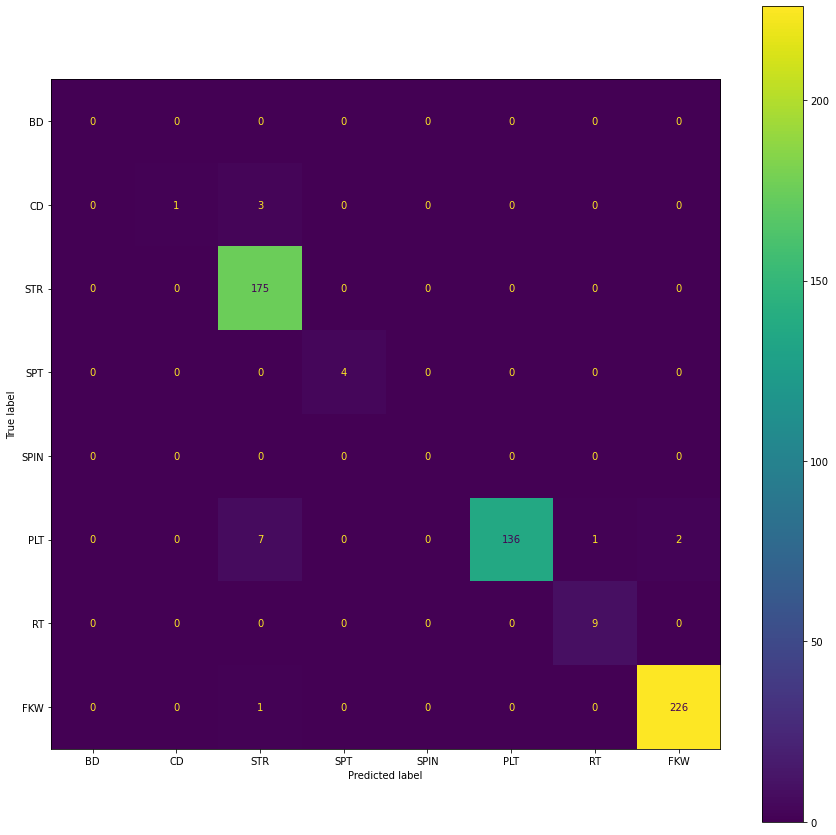

In [31]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


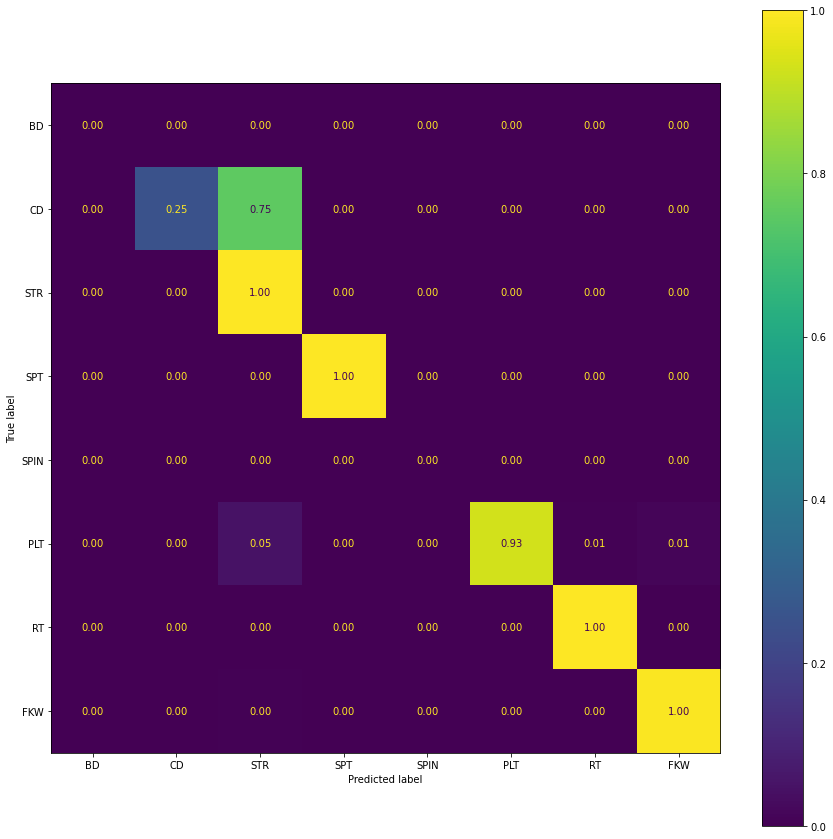

In [32]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

## HICEAS 2002

In [33]:
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'

In [34]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [35]:
encounter_test

['bottlenose s165',
 'pilot s219',
 'pilot s228',
 'pilot s261',
 'pilot s317',
 'pilot s318',
 'roughtoothed s125',
 'roughtoothed s167',
 'roughtoothed s194',
 'roughtoothed s234',
 'roughtoothed s245',
 'spinner s132',
 'spotted s129',
 'spotted s138',
 'spotted s195',
 'spotted s280',
 'spotted s296',
 'striped s124',
 'striped s160',
 'striped s189',
 'striped s205',
 'striped s244']

In [36]:
### run on a encounter encounter[0]

avg_score_list = []
species_10s_pred = []
species_10s_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in [encounter_test[0]]:
# for ee in ['shortbeaked_common s628']:
    print(ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas, sec_tot = enounter_features(encounter_folder, win_size, step_size)
    
    whistleness = model_whistleness.predict(spec_feas)
    whistleness_bin = whistleness[:, 1]>0.9
    num_whistle = np.where(whistleness_bin)[0].shape[0]
    num_frames = whistleness.shape[0]
    print('Number of whistleness frames: '+str(num_whistle)+'/'+str(num_frames)+'('+'str(num_whistle/num_frames)'+')')
    scores = model_species.predict(spec_feas)
    
    # For the whole encounter
    # ave score
    label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.50))))  # .mean(axis=0)
    num_large_score =(label_pred>0.0).sum(axis=0)
    total_score = label_pred.sum(axis=0)
    avg_score = np.zeros(8)
    for cc in range(8):
        if num_large_score[cc] > 0:
            avg_score[cc] = total_score[cc] / num_large_score[cc]
    avg_score_list.append(avg_score)
    print('average score:')
    print(avg_score)
    
    # count_large = (scores>0.70).sum(axis=0)
    print('count_large:')
    print(num_large_score)
    
    # For each 10 sec / 100 frames
    for ii in range(int(floor(num_frames*1.0/100))):
        score_curr = scores[ii*100:(ii+1)*100]
        whistle_bin_curr = whistleness[ii*100:(ii+1)*100, 1]>0.9
        print('Whistleness:')
        num_whistleness_curr = np.where(whistle_bin_curr)[0].shape[0]
        print(num_whistleness_curr)
        
        label_pred_curr = np.sqrt(((score_curr**2.0)*(np.multiply(whistle_bin_curr.reshape(-1, 1), np.ones((1,8))))*((score_curr>0.50))))  # .mean(axis=0)
        num_large_score =(label_pred_curr>0.0).sum(axis=0)
        total_score = label_pred_curr.sum(axis=0)
        avg_score_curr = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score_curr[cc] = total_score[cc] / num_large_score[cc]
        print('average score:')
        print(avg_score_curr)
        
        # count_large = (scores>0.70).sum(axis=0)
        print('count_large:')
        print(num_large_score)
        
        if num_whistleness_curr >= 30:  # whistleness over 3 sec
            species_10s_pred.append(np.argmax(total_score, axis=0))
            species_10s_truth.append(species_dict[species_to_code[ee.split(" ")[0]]])
    print('  ')

bottlenose s165
==HICEAS020908-084843.wav
==HICEAS020908-084943.wav
==HICEAS020908-085043.wav
==HICEAS020908-085143.wav
==HICEAS020908-090007.wav
==HICEAS020908-090107.wav
==HICEAS020908-090207.wav
==HICEAS020908-090307.wav
Total sound length: 403.14
Number of whistleness frames: 736/3879(str(num_whistle/num_frames))
average score:
[0.77 0.67 0.66 0.7  0.74 0.58 0.8  0.67]
count_large:
[229   2  27  84  27  15 126  43]
Whistleness:
29
average score:
[0.79 0.   0.   0.   0.   0.   0.   0.53]
count_large:
[26  0  0  0  0  0  0  1]
Whistleness:
28
average score:
[0.8 0.  0.  0.  0.  0.  0.  0. ]
count_large:
[27  0  0  0  0  0  0  0]
Whistleness:
76
average score:
[0.65 0.   0.66 0.68 0.52 0.   0.   0.  ]
count_large:
[12  0 12 29  1  0  0  0]
Whistleness:
79
average score:
[0.78 0.   0.55 0.67 0.   0.   0.   0.  ]
count_large:
[49  0  1 13  0  0  0  0]
Whistleness:
29
average score:
[0.69 0.   0.   0.68 0.   0.   0.   0.  ]
count_large:
[18  0  0  6  0  0  0  0]
Whistleness:
66
average s

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(species_10s_truth, species_10s_pred, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[  3   0   0   1   0   0   3   1]
 [  0   0   0   0   0   0   0   0]
 [  0   2  40   5   0   0   0   0]
 [  0   0   2  94   0   0   0   1]
 [  0   0   1   0  16   1   4   0]
 [  0   0  23   1   0 240   1   0]
 [  0   0   1   0   1   1 160   0]
 [  0   0   0   0   0   0   0   0]]

[[0.38 0.   0.   0.12 0.   0.   0.38 0.12]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.04 0.85 0.11 0.   0.   0.   0.  ]
 [0.   0.   0.02 0.97 0.   0.   0.   0.01]
 [0.   0.   0.05 0.   0.73 0.05 0.18 0.  ]
 [0.   0.   0.09 0.   0.   0.91 0.   0.  ]
 [0.   0.   0.01 0.   0.01 0.01 0.98 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [38]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

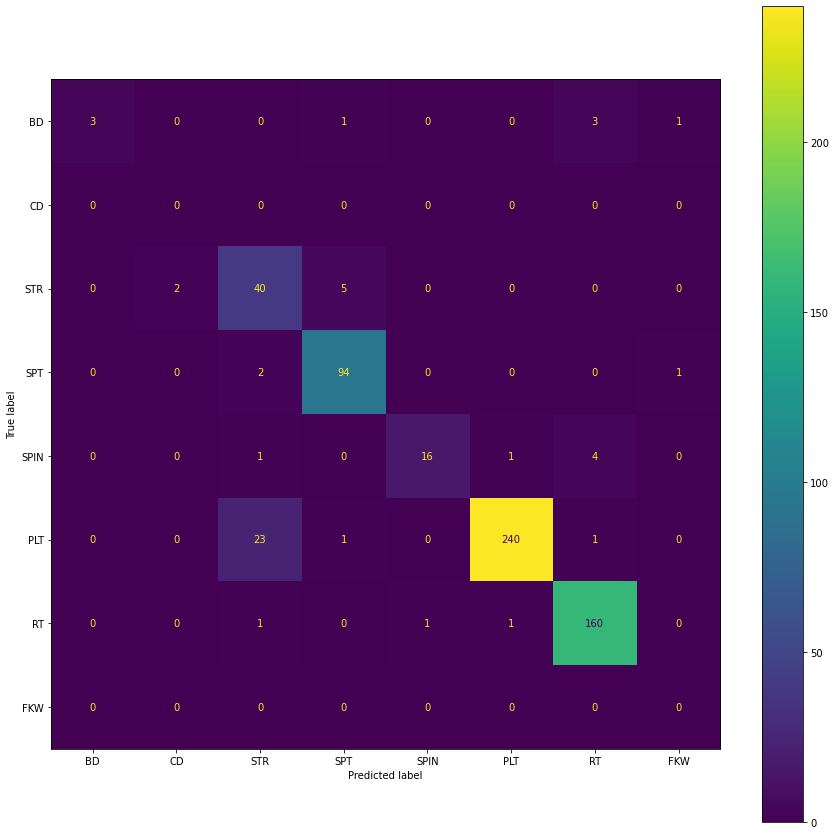

In [39]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


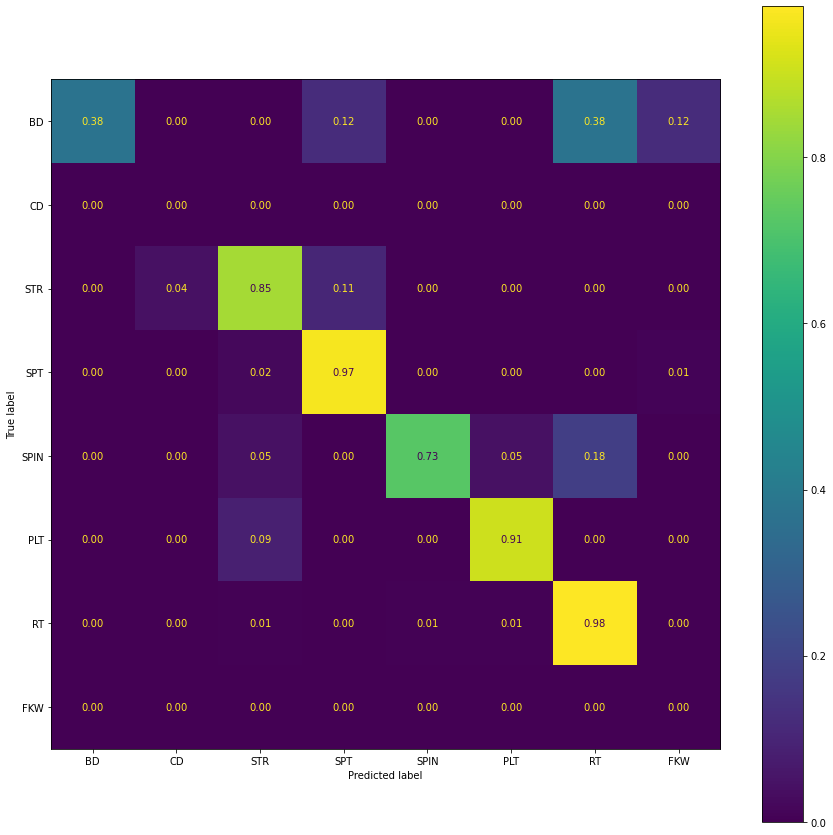

In [40]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

## PICEAS 2005

In [41]:
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'

In [42]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [43]:
encounter_test

['bottlenose a101',
 'bottlenose a73',
 'false_killer a215',
 'false_killer a245',
 'false_killer a249',
 'false_killer a250',
 'false_killer a253',
 'false_killer a57',
 'false_killer a67',
 'pilot a86',
 'pilot a93',
 'roughtoothed a178',
 'roughtoothed a179',
 'roughtoothed a23',
 'roughtoothed a75',
 'spinner a104',
 'spinner a132',
 'spinner a90',
 'spinner a98',
 'spotted a116',
 'spotted a117',
 'spotted a122',
 'spotted a25',
 'spotted a2600',
 'spotted a35',
 'striped a107',
 'striped a108',
 'striped a151',
 'striped a50',
 'striped a94',
 'striped a96']

In [44]:
### run on a encounter encounter[0]

avg_score_list = []
species_10s_pred = []
species_10s_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in [encounter_test[0]]:
# for ee in ['shortbeaked_common s628']:
    print(ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas, sec_tot = enounter_features(encounter_folder, win_size, step_size)
    
    whistleness = model_whistleness.predict(spec_feas)
    whistleness_bin = whistleness[:, 1]>0.9
    num_whistle = np.where(whistleness_bin)[0].shape[0]
    num_frames = whistleness.shape[0]
    print('Number of whistleness frames: '+str(num_whistle)+'/'+str(num_frames)+'('+'str(num_whistle/num_frames)'+')')
    scores = model_species.predict(spec_feas)
    
    # For the whole encounter
    # ave score
    label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.50))))  # .mean(axis=0)
    num_large_score =(label_pred>0.0).sum(axis=0)
    total_score = label_pred.sum(axis=0)
    avg_score = np.zeros(8)
    for cc in range(8):
        if num_large_score[cc] > 0:
            avg_score[cc] = total_score[cc] / num_large_score[cc]
    avg_score_list.append(avg_score)
    print('average score:')
    print(avg_score)
    
    # count_large = (scores>0.70).sum(axis=0)
    print('count_large:')
    print(num_large_score)
    
    # For each 10 sec / 100 frames
    for ii in range(int(floor(num_frames*1.0/100))):
        score_curr = scores[ii*100:(ii+1)*100]
        whistle_bin_curr = whistleness[ii*100:(ii+1)*100, 1]>0.9
        print('Whistleness:')
        num_whistleness_curr = np.where(whistle_bin_curr)[0].shape[0]
        print(num_whistleness_curr)
        
        label_pred_curr = np.sqrt(((score_curr**2.0)*(np.multiply(whistle_bin_curr.reshape(-1, 1), np.ones((1,8))))*((score_curr>0.50))))  # .mean(axis=0)
        num_large_score =(label_pred_curr>0.0).sum(axis=0)
        total_score = label_pred_curr.sum(axis=0)
        avg_score_curr = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score_curr[cc] = total_score[cc] / num_large_score[cc]
        print('average score:')
        print(avg_score_curr)
        
        # count_large = (scores>0.70).sum(axis=0)
        print('count_large:')
        print(num_large_score)
        
        if num_whistleness_curr >= 30:  # whistleness over 3 sec
            species_10s_pred.append(np.argmax(total_score, axis=0))
            species_10s_truth.append(species_dict[species_to_code[ee.split(" ")[0]]])
    print('  ')

bottlenose a101
==piceas-050824-080400.wav
==piceas-050824-080600.wav
==piceas-050824-080800.wav
==piceas-050824-081000.wav
==piceas-050824-081200.wav
==piceas-050824-081400.wav
==piceas-050824-081600.wav
==piceas-050824-081800.wav
==piceas-050824-082000.wav
==piceas-050824-082200.wav
==piceas-050824-082400.wav
==piceas-050824-082600.wav
==piceas-050824-082648.wav
==piceas-050824-082800.wav
==piceas-050824-083000.wav
==piceas-050824-083200.wav
==piceas-050824-083400.wav
==piceas-050824-083600.wav
==piceas-050824-083800.wav
==piceas-050824-084000.wav
Total sound length: 2236.179
Number of whistleness frames: 11094/21981(str(num_whistle/num_frames))
average score:
[0.93 0.62 0.75 0.74 0.69 0.68 0.56 0.69]
count_large:
[9209    7  526  677  248   43    4   52]
Whistleness:
21
average score:
[0.88 0.   0.   0.59 0.   0.   0.   0.  ]
count_large:
[21  0  0  1  0  0  0  0]
Whistleness:
5
average score:
[0.79 0.   0.   0.   0.   0.   0.   0.  ]
count_large:
[5 0 0 0 0 0 0 0]
Whistleness:
7
av

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(species_10s_truth, species_10s_pred, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[371   0   4   1   4   0   0   1]
 [  0   0   0   0   0   0   0   0]
 [  0   0  79   2   0   0   0   0]
 [  0   0   5 101   6   0   0   1]
 [  1   0   2   1  88   0   1   0]
 [  0   0   0   0   0  65   0   2]
 [  1   0   0   0   0   0  92   4]
 [  1   0   4   0   0   0   0 484]]

[[0.97 0.   0.01 0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.98 0.02 0.   0.   0.   0.  ]
 [0.   0.   0.04 0.89 0.05 0.   0.   0.01]
 [0.01 0.   0.02 0.01 0.95 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.03]
 [0.01 0.   0.   0.   0.   0.   0.95 0.04]
 [0.   0.   0.01 0.   0.   0.   0.   0.99]]


In [46]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

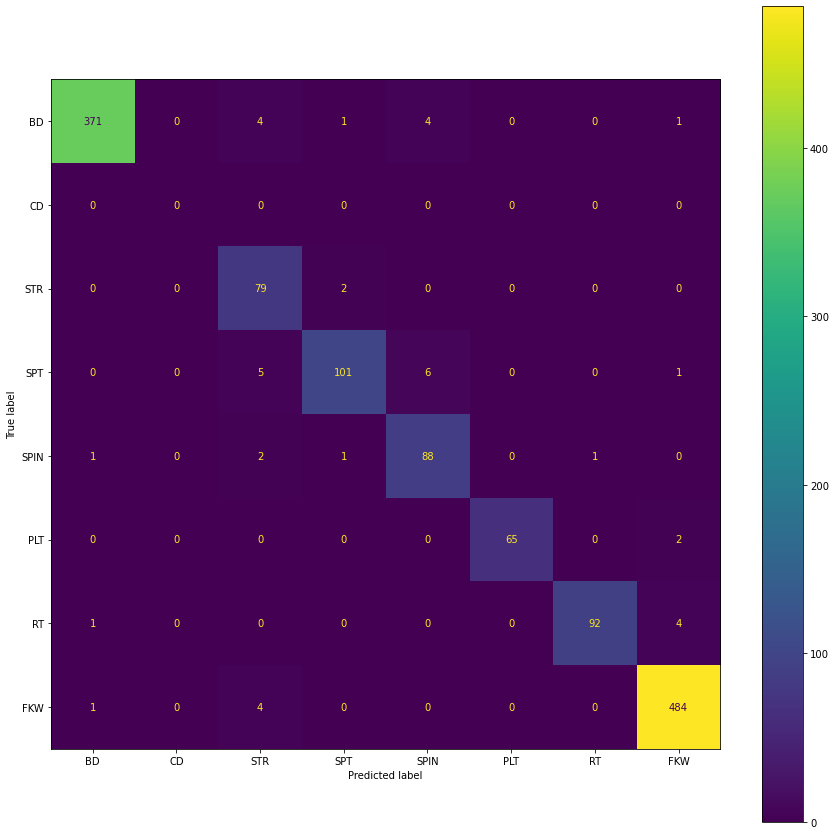

In [47]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


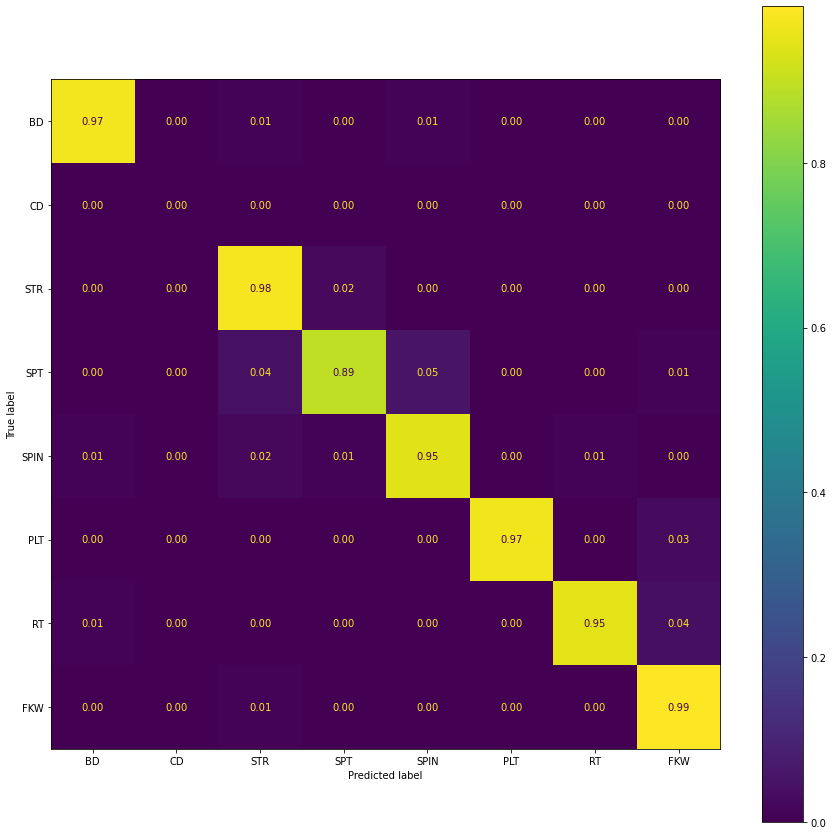

In [48]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)